<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 3: Web APIs & NLP on Subreddit (CatAdvice & DogAdvice)

--- 
# Part 3

Part 3 contains modelling, evaluation, conclusion and recommendations

---

## Problem Statement

An influx of inexperienced pets owners overly reliant on vets and pet store reduces work efficiency, how can we optimize it?

Our flagship product (Pet Companions), our highly-rated mobile application offering pet owners information through:
- AI-powered chatbot 
 - First level of customer inquiry
 - Source of information for pet owners
- Recommends articles based on classification of queries
- A knowledge-bank filled with information sourced from vets, pet experts and users

However, our chatbot requires an update to increase its effectiveness in order to meet higher demand.

Using web apis and NLP to create an improved classifier model to better classify posts to cats and dogs and recommend information to pet owners accordingly.

### Contents:
- [Data Preparation](#Data-Preparation)
- [Modelling and Evaluation](#Modelling-and-Evaluation)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

## Data Preparation

In [1]:
# Import libraries

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import f1_score, confusion_matrix, accuracy_score

import warnings
warnings.filterwarnings(action = 'ignore')

In [2]:
# Set display settings for dataframe

pd.set_option('display.max_columns',90)
pd.set_option('display.max_rows',50)
pd.set_option('display.max_colwidth', 100)

In [3]:
# Import dataset

pet_adv_cleaned = pd.read_csv('../data/pet_adv_cleaned.csv')

In [4]:
# Display the number of rows and columns
pet_adv_cleaned.shape

(4600, 5)

In [5]:
# Display the first 5 rows of the data
pet_adv_cleaned.head()

,subreddit,category,title_selftext,cleaned_text,subreddit_target
0,CatAdvice,General,Transporting cats on a 3.5 hr drive to move to a new place??? Best way to make them comfortable?...,transporting hr drive move new place best way make comfortable carrier feel carrier little small...,1
1,CatAdvice,Behavioral,Cat bullying? I recently adopted an 8 week old kitten (Susan) &amp; brought her home to my apart...,bullying recently adopted week old kitten susan brought home apartment currently live partner ye...,1
2,CatAdvice,Behavioral,Need advice on an anxious kitty as a first time owner. Tldr at bottom\n\nIm a first time cat own...,need advice anxious kitty first time owner tldr bottom im first time owner loveley yr old tabby ...,1
3,CatAdvice,Sensitive/Seeking Support,Cat jealousy issue Do cats really love you? I've had 3 kittens for a little over a year. 2 of my...,jealousy issue really love ive kitten little year act super loving toward always cuddle want pet...,1
4,CatAdvice,Introductions,Introducing Cats When One is Deaf My husband and I each moved into our new home a year ago with ...,introducing one deaf husband moved new home year ago toby yo completely deaf moxie ish yo tried ...,1


In [6]:
# Display the last 5 rows of the data
pet_adv_cleaned.tail()

,subreddit,category,title_selftext,cleaned_text,subreddit_target
4595,DogAdvice,Advice,"Advice for me ? My dog is half Alaskan malamute, half german shepherd. She is 5 years old and we...",advice half alaskan malamute half german shepherd year old weighs pound house trained lactose in...,0
4596,DogAdvice,Question,my puppy chews up everything and i don't know what to do i have a rottweiler mix. he is 5 months...,puppy chew everything dont know rottweiler mix month old brought home sooo good accident went po...,0
4597,DogAdvice,Advice,How can I rehome a dog? I brought in a small boy that a homeless woman couldn’t take care of for...,rehome brought small boy homeless woman take care obvious reason took vet get vaccine neutered u...,0
4598,DogAdvice,Question,Dog won’t stop whining with new kitten Our older cat has passed away unfortunately it was old so...,stop whining new kitten older passed away unfortunately old recently adopted new kitten week old...,0
4599,DogAdvice,Question,Dog is hiding under bed since new dog I recently got a new dog(bulldog) who is about 3 months ol...,hiding bed since new recently got new dogbulldog month old suddenly around year old started hidi...,0


In [7]:
# Split data with stratification to train and test datasets for modelling and evaluation
X_train, X_test, y_train, y_test = train_test_split(pet_adv_cleaned.cleaned_text, pet_adv_cleaned.subreddit_target, 
                                                    test_size = 0.2, random_state = 42, 
                                                    stratify=pet_adv_cleaned.subreddit_target)

In [8]:
# Check if train dataset is split evenly
y_train.value_counts()

1    1840
0    1840
Name: subreddit_target, dtype: int64

In [9]:
# Check if test dataset is split evenly
y_test.value_counts()

0    460
1    460
Name: subreddit_target, dtype: int64

## Modelling and Evaluation

In [10]:
### Instantiate transformers

## Unigram Vectorizer
unigram_vect = CountVectorizer()

## Bigram Vectorizer
bigram_vect = CountVectorizer(ngram_range=(2,2))

## Tf-IDF Vectorizer
tfidf_vect = TfidfVectorizer()


In [11]:
### Instantiate models

## Bernoulli Naive Bayes
BernNB = BernoulliNB()

## Multinomila Naive Bayes
MultiNB = MultinomialNB()

## Gaussian Naive Bayes
GausNB = GaussianNB()

## Logistic Regression
LogReg = LogisticRegression(solver='liblinear')

## K-nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=5)

In [12]:
## Modelling with Multinomial Naive Bayes with TF-IDF as vectorizer

print('*MultiNB with Tf-Idf as vectorizer*')

# Create Pipeline
pipe_tfidf_multi = Pipeline([
    ('tfidf_vect', tfidf_vect),
    ('MultiNB', MultiNB)
])

# Train model
pipe_tfidf_multi.fit(X_train, y_train)

# Accuracy score for train dataset
Acc_score_tfidf_multi_train = pipe_tfidf_multi.score(X_train, y_train)
print(f'Accuracy_score for train: {Acc_score_tfidf_multi_train}')

# Accuracy score for test dataset
Acc_score_tfidf_multi_test = pipe_tfidf_multi.score(X_test, y_test)
print(f'Accuracy_score for test: {Acc_score_tfidf_multi_test}')

# F1 score for test dataset
f1_score_tfidf_multi_test = f1_score(y_test, pipe_tfidf_multi.predict(X_test))
print(f'f1_score for test: {f1_score_tfidf_multi_test}')

# Cross_val_score
tfidf_multi_cvs = cross_val_score(pipe_tfidf_multi, pet_adv_cleaned.cleaned_text, 
                                       pet_adv_cleaned.subreddit_target, cv=5).mean()
print(f'Cross Val Score: {tfidf_multi_cvs}')

*MultiNB with Tf-Idf as vectorizer*
Accuracy_score for train: 0.9559782608695652
Accuracy_score for test: 0.8902173913043478
f1_score for test: 0.8915145005370569
Cross Val Score: 0.893695652173913


In [13]:
## Modelling with Multinomial Naive Bayes with unigram_vectorizer

print('*MultiNB with unigram_vectorizer*')

# Create Pipeline
pipe_uni_multi = Pipeline([
    ('unigram_vect', unigram_vect),
    ('MultiNB', MultiNB)
])

# Train model
pipe_uni_multi.fit(X_train, y_train)

# Accuracy score for train dataset
Acc_score_uni_multi_train = pipe_uni_multi.score(X_train, y_train)
print(f'Accuracy_score for train: {Acc_score_uni_multi_train}')

# Accuracy score for test dataset
Acc_score_uni_multi_test = pipe_uni_multi.score(X_test, y_test)
print(f'Accuracy_score for test: {Acc_score_uni_multi_test}')

# F1 score for test dataset
f1_score_uni_multi_test = f1_score(y_test, pipe_uni_multi.predict(X_test))
print(f'f1_score for test: {f1_score_uni_multi_test}')

# Cross_val_score
uni_multi_cvs = cross_val_score(pipe_uni_multi, pet_adv_cleaned.cleaned_text, 
                                       pet_adv_cleaned.subreddit_target, cv=5).mean()
print(f'Cross Val Score: {uni_multi_cvs}')




*MultiNB with unigram_vectorizer*
Accuracy_score for train: 0.9581521739130435
Accuracy_score for test: 0.9021739130434783
f1_score for test: 0.9002217294900222
Cross Val Score: 0.9023913043478261


In [14]:
## Modelling with Multinomial Naive Bayes with bigram_vectorizer

print('*MultiNB with bigram_vectorizer*')

# Create Pipeline
pipe_bi_multi = Pipeline([
    ('bigram_vect', bigram_vect),
    ('MultiNB', MultiNB)
])

# Train model
pipe_bi_multi.fit(X_train, y_train)

# Accuracy score for train dataset
Acc_score_bi_multi_train = pipe_bi_multi.score(X_train, y_train)
print(f'Accuracy_score for train: {Acc_score_bi_multi_train}')

# Accuracy score for test dataset
Acc_score_bi_multi_test = pipe_bi_multi.score(X_test, y_test)
print(f'Accuracy_score for test: {Acc_score_bi_multi_test}')

# F1 score for test dataset
f1_score_bi_multi_test = f1_score(y_test, pipe_bi_multi.predict(X_test))
print(f'f1_score for test: {f1_score_bi_multi_test}')

# Cross_val_score
bi_multi_cvs = cross_val_score(pipe_bi_multi, pet_adv_cleaned.cleaned_text, 
                                       pet_adv_cleaned.subreddit_target, cv=5).mean()
print(f'Cross Val Score: {bi_multi_cvs}')



*MultiNB with bigram_vectorizer*
Accuracy_score for train: 0.9997282608695652
Accuracy_score for test: 0.8402173913043478
f1_score for test: 0.8476683937823835
Cross Val Score: 0.8232608695652173


In [15]:
## Modelling with Bernoulli Naive Bayes with TF-IDF as vectorizer

print('*BernNB with Tf-Idf as vectorizer*')

# Create Pipeline
pipe_tfidf_bern = Pipeline([
    ('tfidf_vect', tfidf_vect),
    ('BernNB', BernNB)
])

# Train model
pipe_tfidf_bern.fit(X_train, y_train)

# Accuracy score for train dataset
Acc_score_tfidf_bern_train = pipe_tfidf_bern.score(X_train, y_train)
print(f'Accuracy_score for train: {Acc_score_tfidf_bern_train}')

# Accuracy score for test dataset
Acc_score_tfidf_bern_test = pipe_tfidf_bern.score(X_test, y_test)
print(f'Accuracy_score for test: {Acc_score_tfidf_bern_test}')

# F1 score for test dataset
f1_score_tfidf_bern_test = f1_score(y_test, pipe_tfidf_bern.predict(X_test))
print(f'f1_score for test: {f1_score_tfidf_bern_test}')

# Cross_val_score
tfidf_bern_cvs = cross_val_score(pipe_tfidf_bern, pet_adv_cleaned.cleaned_text, 
                                       pet_adv_cleaned.subreddit_target, cv=5).mean()
print(f'Cross Val Score: {tfidf_bern_cvs}')




*BernNB with Tf-Idf as vectorizer*
Accuracy_score for train: 0.9635869565217391
Accuracy_score for test: 0.9
f1_score for test: 0.8977777777777778
Cross Val Score: 0.9017391304347827


In [16]:
## Modelling with Bernoulli Naive Bayes with unigram_vectorizer

print('*BernNB with Unigram_vectorizer*')

# Create Pipeline
pipe_uni_bern = Pipeline([
    ('unigram_vect', unigram_vect),
    ('BernNB', BernNB)
])

# Train model
pipe_uni_bern.fit(X_train, y_train)

# Accuracy score for train dataset
Acc_score_uni_bern_train = pipe_uni_bern.score(X_train, y_train)
print(f'Accuracy_score for train: {Acc_score_uni_bern_train}')

# Accuracy score for test dataset
Acc_score_uni_bern_test = pipe_uni_bern.score(X_test, y_test)
print(f'Accuracy_score for test: {Acc_score_uni_bern_test}')

# F1 score for test dataset
f1_score_uni_bern_test = f1_score(y_test, pipe_uni_bern.predict(X_test))
print(f'f1_score for test: {f1_score_uni_bern_test}')

# Cross_val_score
uni_bern_cvs = cross_val_score(pipe_uni_bern, pet_adv_cleaned.cleaned_text, 
                                       pet_adv_cleaned.subreddit_target, cv=5).mean()
print(f'Cross Val Score: {uni_bern_cvs}')




*BernNB with Unigram_vectorizer*
Accuracy_score for train: 0.9635869565217391
Accuracy_score for test: 0.9
f1_score for test: 0.8977777777777778
Cross Val Score: 0.9017391304347827


In [17]:
## Modelling with Bernoulli Naive Bayes with bigram_vectorizer

print('*BernNB with bigram_vectorizer*')

# Create Pipeline
pipe_bi_bern = Pipeline([
    ('bigram_vect', bigram_vect),
    ('BernNB', BernNB)
])

# Train model
pipe_bi_bern.fit(X_train, y_train)

# Accuracy score for train dataset
Acc_score_bi_bern_train = pipe_bi_bern.score(X_train, y_train)
print(f'Accuracy_score for train: {Acc_score_bi_bern_train}')

# Accuracy score for test dataset
Acc_score_bi_bern_test = pipe_bi_bern.score(X_test, y_test)
print(f'Accuracy_score for test: {Acc_score_bi_bern_test}')

# F1 score for test dataset
f1_score_bi_bern_test = f1_score(y_test, pipe_bi_bern.predict(X_test))
print(f'f1_score for test: {f1_score_bi_bern_test}')

# Cross_val_score
bi_bern_cvs = cross_val_score(pipe_bi_bern, pet_adv_cleaned.cleaned_text, 
                                       pet_adv_cleaned.subreddit_target, cv=5).mean()
print(f'Cross Val Score: {bi_bern_cvs}')




*BernNB with bigram_vectorizer*
Accuracy_score for train: 1.0
Accuracy_score for test: 0.825
f1_score for test: 0.815578465063001
Cross Val Score: 0.8221739130434782


In [18]:
## Modelling with Gaussian Naive Bayes with TF-IDF as vectorizer

print('*GausNB with Tf-Idf as vectorizer*')

# Fit and transform X_train using tfidf vectorizer
X_train_tfidf = tfidf_vect.fit_transform(X_train)

# Train model
GausNB.fit(X_train_tfidf.toarray(), y_train)

# Accuracy score for train dataset
Acc_score_tfidf_gaus_train = GausNB.score(X_train_tfidf.toarray(), y_train)
print(f'Accuracy_score for train: {Acc_score_tfidf_gaus_train}')

# Transform X_test using tfidf vectorizer
X_test_tfidf = tfidf_vect.transform(X_test)

# Accuracy score for test dataset
Acc_score_tfidf_gaus_test = GausNB.score(X_test_tfidf.toarray(), y_test)
print(f'Accuracy_score for test: {Acc_score_tfidf_gaus_test}')

# F1 score for test dataset
f1_score_tfidf_gaus_test = f1_score(y_test, GausNB.predict(X_test_tfidf.toarray()))
print(f'f1_score for test: {f1_score_tfidf_gaus_test}')

# Transform pet_adv_cleaned.cleaned_text using tfidf vectorizer
X_tfidf = tfidf_vect.transform(pet_adv_cleaned.cleaned_text)

# Cross_val_score
GausNB_tfidf_cvs = cross_val_score(GausNB, X_tfidf.toarray(), 
                                       pet_adv_cleaned.subreddit_target, cv=5).mean()
print(f'Cross Val Score: {GausNB_tfidf_cvs}')



*GausNB with Tf-Idf as vectorizer*
Accuracy_score for train: 0.9717391304347827
Accuracy_score for test: 0.7423913043478261
f1_score for test: 0.7518324607329844
Cross Val Score: 0.7345652173913044


In [19]:
## Modelling with Gaussian Naive Bayes with unigram_vectorizer

print('*GausNB with unigram_vectorizer*')

# Fit and transform X_train using unigram_vectorizer
X_train_uni = unigram_vect.fit_transform(X_train)

# Train model
GausNB.fit(X_train_uni.toarray(), y_train)

# Accuracy score for train dataset
Acc_score_uni_gaus_train = GausNB.score(X_train_uni.toarray(), y_train)
print(f'Accuracy_score for train: {Acc_score_uni_gaus_train}')

# Transform X_test using unigram_vectorizer
X_test_uni = unigram_vect.transform(X_test)

# Accuracy score for test dataset
Acc_score_uni_gaus_test = GausNB.score(X_test_uni.toarray(), y_test)
print(f'Accuracy_score for test: {Acc_score_uni_gaus_test}')

# F1 score for test dataset
f1_score_uni_gaus_test = f1_score(y_test, GausNB.predict(X_test_uni.toarray()))
print(f'f1_score for test: {f1_score_uni_gaus_test}')

# Transform pet_adv_cleaned.cleaned_text using unigram-vectorizer
X_uni = unigram_vect.transform(pet_adv_cleaned.cleaned_text)

# Cross_val_score
GausNB_uni_cvs = cross_val_score(GausNB, X_uni.toarray(), 
                                       pet_adv_cleaned.subreddit_target, cv=5).mean()
print(f'Cross Val Score: {GausNB_uni_cvs}')



*GausNB with unigram_vectorizer*
Accuracy_score for train: 0.9644021739130435
Accuracy_score for test: 0.7630434782608696
f1_score for test: 0.7775510204081633
Cross Val Score: 0.7565217391304347


In [20]:
## Modelling with Gaussian Naive Bayes with bigram_vectorizer

print('*GausNB with bigram_vectorizer*')

bigram_vect_gaus = CountVectorizer(ngram_range=(2,2), max_features = 2000)

# Fit and transform X_train using bigram_vectorizer
X_train_bi = bigram_vect_gaus.fit_transform(X_train)

# Train model
GausNB.fit(X_train_bi.toarray(), y_train)

# Accuracy score for train dataset
Acc_score_bi_gaus_train = GausNB.score(X_train_bi.toarray(), y_train)
print(f'Accuracy_score for train: {Acc_score_bi_gaus_train}')

# Transform X_test using bigram_vectorizer
X_test_bi = bigram_vect_gaus.transform(X_test)

# Accuracy score for test dataset
Acc_score_bi_gaus_test = GausNB.score(X_test_bi.toarray(), y_test)
print(f'Accuracy_score for test: {Acc_score_bi_gaus_test}')

# F1 score for test dataset
f1_score_bi_gaus_test = f1_score(y_test, GausNB.predict(X_test_bi.toarray()))
print(f'f1_score for test: {f1_score_bi_gaus_test}')

# Transform pet_adv_cleaned.cleaned_text using bigram-vectorizer
X_bi = bigram_vect_gaus.transform(pet_adv_cleaned.cleaned_text)

# Cross_val_score
GausNB_bi_cvs = cross_val_score(GausNB, X_bi.toarray(), 
                                       pet_adv_cleaned.subreddit_target, cv=5).mean()
print(f'Cross Val Score: {GausNB_bi_cvs}')


*GausNB with bigram_vectorizer*
Accuracy_score for train: 0.8445652173913043
Accuracy_score for test: 0.7739130434782608
f1_score for test: 0.7425742574257426
Cross Val Score: 0.7565217391304347


In [21]:
## Modelling with Logistic Regression with TF-IDF as vectorizer

print('*Logistic Regression with Tf-Idf as vectorizer*')

# Create Pipeline
pipe_tfidf_logreg = Pipeline([
    ('tfidf_vect', tfidf_vect),
    ('LogReg', LogReg)
])

# Train model
pipe_tfidf_logreg.fit(X_train, y_train)

# Accuracy score for train dataset
Acc_score_tfidf_logreg_train = pipe_tfidf_logreg.score(X_train, y_train)
print(f'Accuracy_score for train: {Acc_score_tfidf_logreg_train}')

# Accuracy score for test dataset
Acc_score_tfidf_logreg_test = pipe_tfidf_logreg.score(X_test, y_test)
print(f'Accuracy_score for test: {Acc_score_tfidf_logreg_test}')

# F1 score for test dataset
f1_score_tfidf_logreg_test = f1_score(y_test, pipe_tfidf_logreg.predict(X_test))
print(f'f1_score for test: {f1_score_tfidf_logreg_test}')

# Cross_val_score
tfidf_lr_cvs = cross_val_score(pipe_tfidf_logreg, pet_adv_cleaned.cleaned_text, 
                                       pet_adv_cleaned.subreddit_target, cv=5).mean()
print(f'Cross Val Score: {tfidf_lr_cvs}')



*Logistic Regression with Tf-Idf as vectorizer*
Accuracy_score for train: 0.960054347826087
Accuracy_score for test: 0.8858695652173914
f1_score for test: 0.8805460750853243
Cross Val Score: 0.89


In [22]:
## Modelling with Logistic Regression with unigram_vectorizer

print('*Logistic Regression with unigram_vectorizer*')

# Create Pipeline
pipe_uni_logreg = Pipeline([
    ('unigram_vect', unigram_vect),
    ('LogReg', LogReg)
])

# Train model
pipe_uni_logreg.fit(X_train, y_train)

# Accuracy score for train dataset
Acc_score_uni_logreg_train = pipe_uni_logreg.score(X_train, y_train)
print(f'Accuracy_score for train: {Acc_score_uni_logreg_train}')

# Accuracy score for test dataset
Acc_score_uni_logreg_test = pipe_uni_logreg.score(X_test, y_test)
print(f'Accuracy_score for test: {Acc_score_uni_logreg_test}')

# F1 score for test dataset
f1_score_uni_logreg_test = f1_score(y_test, pipe_uni_logreg.predict(X_test))
print(f'f1_score for test: {f1_score_uni_logreg_test}')

# Cross_val_score
uni_lr_cvs = cross_val_score(pipe_uni_logreg, pet_adv_cleaned.cleaned_text, 
                                       pet_adv_cleaned.subreddit_target, cv=5).mean()
print(f'Cross Val Score: {uni_lr_cvs}')



*Logistic Regression with unigram_vectorizer*
Accuracy_score for train: 0.9997282608695652
Accuracy_score for test: 0.8804347826086957
f1_score for test: 0.8785871964679911
Cross Val Score: 0.878695652173913


In [23]:
## Modelling with Logistic Regression with bigram_vectorizer

print('*Logistic Regression with bigram_vectorizer*')

# Create Pipeline
pipe_bi_logreg = Pipeline([
    ('bigram_vect', bigram_vect),
    ('LogReg', LogReg)
])

# Train model
pipe_bi_logreg.fit(X_train, y_train)

# Accuracy score for train dataset
Acc_score_bi_logreg_train = pipe_bi_logreg.score(X_train, y_train)
print(f'Accuracy_score for train: {Acc_score_bi_logreg_train}')

# Accuracy score for test dataset
Acc_score_bi_logreg_test = pipe_bi_logreg.score(X_test, y_test)
print(f'Accuracy_score for test: {Acc_score_bi_logreg_test}')

# F1 score for test dataset
f1_score_bi_logreg_test = f1_score(y_test, pipe_bi_logreg.predict(X_test))
print(f'f1_score for test: {f1_score_bi_logreg_test}')

# Cross_val_score
bi_lr_cvs = cross_val_score(pipe_bi_logreg, pet_adv_cleaned.cleaned_text, 
                                       pet_adv_cleaned.subreddit_target, cv=5).mean()
print(f'Cross Val Score: {bi_lr_cvs}')




*Logistic Regression with bigram_vectorizer*
Accuracy_score for train: 1.0
Accuracy_score for test: 0.7815217391304348
f1_score for test: 0.7598566308243727
Cross Val Score: 0.7867391304347826


#### Hyperparameter tuning for selected model with highest F1 score

In [24]:
## Hyperparameter tuning on Model using with Multinomial Naive Bayes and unigram_vectorizer

print('*MultiNB using unigram_vectorizer with hyperparameter tuning*')

# Create Pipeline
pipe_uni_multi_gs = Pipeline([
    ('unigram_vect', unigram_vect),
    ('MultiNB', MultiNB)
])

# Hyperparameters testing
pipe_uni_multi_gs_params = {'unigram_vect__max_df': [0.5], #[0.1, 0.4, 0.5, 0.6]
                             'unigram_vect__max_features': [4000], #[3500, 4000, 5000, 6000]
                             'unigram_vect__ngram_range' : [(1,1)], #[(1,1), (1,3)]
                             'MultiNB__alpha': [0.1]} #[0.08, 0.1, 0.2, 0.3]


model_gs = GridSearchCV(pipe_uni_multi_gs, pipe_uni_multi_gs_params, cv=5, n_jobs = -1, verbose=1)

# Train model
model_gs.fit(X_train, y_train)

# Accuracy score for train dataset
Acc_score_uni_multi_gs_train = model_gs.best_score_
print(f'Accuracy_score for train: {Acc_score_uni_multi_gs_train}')

# Accuracy score for test dataset
Acc_score_uni_multi_gs_test = model_gs.score(X_test, y_test)
print(f'Accuracy_score for test: {Acc_score_uni_multi_gs_test}')

# F1 score for test dataset
f1_score_uni_multi_gs_test = f1_score(y_test, model_gs.predict(X_test))
print(f'f1_score for test: {f1_score_uni_multi_gs_test}')

# Cross_val_score
uni_multi_gs_cvs = cross_val_score(model_gs.best_estimator_, pet_adv_cleaned.cleaned_text, 
                                       pet_adv_cleaned.subreddit_target, cv=5).mean()
print(f'Cross Val Score: {uni_multi_gs_cvs}')

print('\n')

print('Best model parameters after hyperparameter tuning')
print(model_gs.best_params_)


*MultiNB using unigram_vectorizer with hyperparameter tuning*
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Accuracy_score for train: 0.9032608695652173
Accuracy_score for test: 0.9043478260869565
f1_score for test: 0.9015659955257271
Cross Val Score: 0.9013043478260869


Best model parameters after hyperparameter tuning
{'MultiNB__alpha': 0.1, 'unigram_vect__max_df': 0.5, 'unigram_vect__max_features': 4000, 'unigram_vect__ngram_range': (1, 1)}


In [25]:
# Name vectorizer of the best model after hyperparameter tuning
model_gs_vect = model_gs.best_estimator_.steps[0][1]

# Name the estimator of the best model after hyperparameter tuning
model_gs_NB = model_gs.best_estimator_.steps[1][1]

In [26]:
# Display top words used as predictors for posts belonging to or dogs

delta_log_prob = model_gs_NB.feature_log_prob_[1, :] - model_gs_NB.feature_log_prob_[0, :]
prob = pd.DataFrame(delta_log_prob, index=model_gs_vect.get_feature_names_out())
prob.rename(columns = {0:'delta_log_prob'}, inplace = True)
prob.sort_values(by = 'delta_log_prob', inplace=True)

print('Top 10 words for cats')
print(prob.tail(10).sort_values(by = 'delta_log_prob', ascending = False))
print('\n')

print('Top 10 words for dogs')
print(prob.head(10))


Top 10 words for cats
           delta_log_prob
meowing          7.360574
meow             7.097173
resident         6.988370
litterbox        6.451266
feliway          6.068980
tabby            5.846390
diffuser         5.595867
galaxy           5.595867
jackson          5.559631
swat             5.559631


Top 10 words for dogs
           delta_log_prob
bark            -7.668570
flea            -6.961183
diarrhea        -6.951242
infection       -6.551257
daycare         -6.407238
trainer         -6.389877
treatment       -6.335907
collie          -6.335907
poodle          -6.298238
terrier         -6.238932


##### Interpretation
-- Cat
- The top 10 words for cats are mainly related to cat behaviours such as meowing and swat. Swat could be due to cat's redirect aggression, playfulness or them trying to get your attention. 
- Cats use litterbox whereas dogs may use potty or they do their business outdoor. 
- Jackson Galaxy is a famous Youtuber and an American cat behaviourist who is a specialist in managing the behavior of cats. 
- Feliway diffuser is a product that helps reduce signs of stress in cats.
- Tabby is a type of cat with a ‘M’-shaped marking on its forehead. 

-- Dog
- As for the top 10 words for dogs, they are mainly related to behaviors and medical conditions. 
- Collie, poodle and terroer are unique words for dog types. 


From these top words, it is unexpected that resident and daycare are strong predictors of cat and dog respectively. These appear to be common words that can be used for both cats and dogs. Perhaps, it is because some dog owners are worried to leave their dogs home alone all day, while cat owners feel safe to leave their cats at home as their cats will cope on their own. 

In summary, these top words are relatively distinct to dogs and cats and hence, it has contributed to the high model accuracy. 

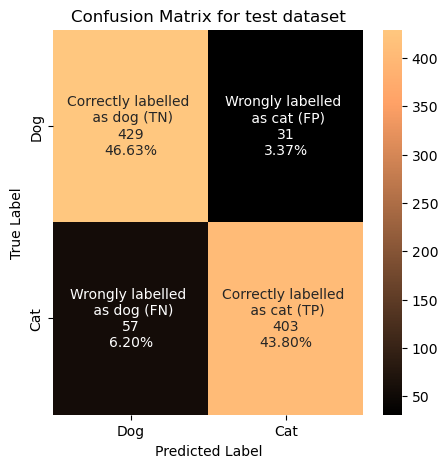

In [27]:
# Confusion Matrix for test dataset using best model after hyperparameter tuning

y_pred = model_gs.predict(X_test)

plt.figure(figsize =(5,5))

cf_matrix = confusion_matrix(y_test, y_pred)

group_names = ['Correctly labelled \n as dog (TN)','Wrongly labelled \n as cat (FP)',
               'Wrongly labelled \n as dog (FN)','Correctly labelled \n as cat (TP)']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='copper')

plt.title('Confusion Matrix for test dataset')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(ticks=(0.5,1.5),labels=('Dog','Cat'))
plt.yticks(ticks=(0.5,1.5),labels=('Dog','Cat'))

plt.show()

##### Interpretation for confusion matrix on test dataset using the model after hyperparameter tuning

- Out of the 920 posts, 90% of the posts were correctly classified as cat or dog. 
- 3.3% of the posts were wrongly classified as cat while 6.2% of the posts were wrongly classified as dog. This number is relatively small. 

#### Baseline model

In [28]:
## Baseline model - knn with TF-IDF as vectorizer

print('*knn with Tf-Idf as vectorizer*')

# Create Pipeline
pipe_tfidf_knn = Pipeline([
    ('tfidf_vect', tfidf_vect),
    ('knn', knn)
])

# Train model
pipe_tfidf_knn.fit(X_train, y_train)

# Accuracy score for train dataset
Acc_score_tfidf_knn_train = pipe_tfidf_knn.score(X_train, y_train)
print(f'Accuracy_score for train: {Acc_score_tfidf_knn_train}')

# Accuracy score for test dataset
Acc_score_tfidf_knn_test = pipe_tfidf_knn.score(X_test, y_test)
print(f'Accuracy_score for test: {Acc_score_tfidf_knn_test}')

# F1 score for test dataset
f1_score_tfidf_knn_test = f1_score(y_test, pipe_tfidf_knn.predict(X_test))
print(f'f1_score for test: {f1_score_tfidf_knn_test}')

# Cross_val_score
tfidf_knn_cvs = cross_val_score(pipe_tfidf_knn, pet_adv_cleaned.cleaned_text, 
                                       pet_adv_cleaned.subreddit_target, cv=5).mean()
print(f'Cross Val Score: {tfidf_knn_cvs}')

*knn with Tf-Idf as vectorizer*
Accuracy_score for train: 0.8654891304347826
Accuracy_score for test: 0.7815217391304348
f1_score for test: 0.7895287958115182
Cross Val Score: 0.7943478260869565


In [29]:
# Save all modelling scores in dictionary

model_eva = {'Model': ['KNN (Baseline)',
                        'MultiNB', 'MultiNB', 'MultiNB',
                       'BernNB', 'BernNB', 'BernNB',
                          'GausNB', 'GausNB', 'GausNB',
                       'Logistic Regression', 'Logistic Regression', 'Logistic Regression',
                       'MultiNB with hyperparameter tuning'
                          ],
 'Data transformation to': ['Tf-idf',
                 'Tf-idf','single_word', '2-word phrase',
                 'Tf-idf','single_word', '2-word phrase',
                 'Tf-idf','single_word', '2-word phrase',
                 'Tf-idf','single_word', '2-word phrase',
                 'single_word'
                 ],
 'Accuracy Score for train': [Acc_score_tfidf_knn_train,
                             Acc_score_tfidf_multi_train, Acc_score_uni_multi_train, Acc_score_bi_multi_train,
                             Acc_score_tfidf_bern_train, Acc_score_uni_bern_train, Acc_score_bi_bern_train,
                             Acc_score_tfidf_gaus_train, Acc_score_uni_gaus_train, Acc_score_bi_gaus_train,
                              Acc_score_tfidf_logreg_train, Acc_score_uni_logreg_train, Acc_score_bi_logreg_train,
                              Acc_score_uni_multi_gs_train
                             ],
 'Accuracy Score for test': [Acc_score_tfidf_knn_test,
                             Acc_score_tfidf_multi_test, Acc_score_uni_multi_test, Acc_score_bi_multi_test, 
                            Acc_score_tfidf_bern_test, Acc_score_uni_bern_test, Acc_score_bi_bern_test,
                             Acc_score_tfidf_gaus_test, Acc_score_uni_gaus_test, Acc_score_bi_gaus_test, 
                             Acc_score_tfidf_logreg_test, Acc_score_uni_logreg_test,  Acc_score_bi_logreg_test,
                             Acc_score_uni_multi_gs_test
                            ],
             
 'F1 score' : [f1_score_tfidf_knn_test,
               f1_score_tfidf_multi_test, f1_score_uni_multi_test, f1_score_bi_multi_test,
               f1_score_tfidf_bern_test, f1_score_uni_bern_test, f1_score_bi_bern_test,
               f1_score_tfidf_gaus_test, f1_score_uni_gaus_test, f1_score_bi_gaus_test,
               f1_score_tfidf_logreg_test, f1_score_uni_logreg_test, f1_score_bi_logreg_test,
               f1_score_uni_multi_gs_test
              ],
 'Cross Val Score': [tfidf_knn_cvs,
                     tfidf_multi_cvs, uni_multi_cvs, bi_multi_cvs,
                    tfidf_bern_cvs, uni_bern_cvs, bi_bern_cvs,
                     GausNB_tfidf_cvs, GausNB_uni_cvs, GausNB_bi_cvs,
                     tfidf_lr_cvs, uni_lr_cvs, bi_lr_cvs,
                     uni_multi_gs_cvs
                    ]
}


In [30]:
# Display model score in df
model_eva_df = pd.DataFrame(model_eva)
model_eva_df

,Model,Data transformation to,Accuracy Score for train,Accuracy Score for test,F1 score,Cross Val Score
0,KNN (Baseline),Tf-idf,0.865489,0.781522,0.789529,0.794348
1,MultiNB,Tf-idf,0.955978,0.890217,0.891515,0.893696
2,MultiNB,single_word,0.958152,0.902174,0.900222,0.902391
3,MultiNB,2-word phrase,0.999728,0.840217,0.847668,0.823261
4,BernNB,Tf-idf,0.963587,0.900000,0.897778,0.901739
5,BernNB,single_word,0.963587,0.900000,0.897778,0.901739
6,BernNB,2-word phrase,1.000000,0.825000,0.815578,0.822174
7,GausNB,Tf-idf,0.971739,0.742391,0.751832,0.734565
8,GausNB,single_word,0.964402,0.763043,0.777551,0.756522
9,GausNB,2-word phrase,0.844565,0.773913,0.742574,0.756522


##### Interpretation for the dafaframe for model evaluation

- Multinomial Naive Bayes model on single word gave the best performance with accuracy score for train and test datasets as well as F1 score above 90%. This model has also shown a lesser degree of overfitting on the train dataset because it has smaller gap between the train and test accuracy score. 
- Further optimisation was conducted to the model by tuning the hyperparameters. It has closed the gap between the train and test’s accuracy score as well as resulted in a slight increase in the test's accuracy score and F1 score. Our model has achieved a high accuracy score of 90%, which is 12% higher than the current model using K_nearest neighbors. 

## Conclusions and Recommendations

### Limitations
- Specific to cat and dog only
 - Cat and dogs are the most popular pets 
 - Model currently limited to cat and dog classification
- Context
 - Recommendations and articles are based on  global trends
 - Not specific to Singapore

### Moving forward and recommendation
- With the achievement of classification model, Multinomial Naive Bayes having high 90% accuracy score and F1 score, we will like to recommend the upgrade of our application's chatbot from the current KNN model to Multinomial Naive Bayes. This will result in a 12% increase in the accuaracy.
- With the upgrade of the app, we can potentially implement options for customers to highlight if they have been directed to the wrong resources. At the same time, we can collect user's interaction data to further improve our application's accuracy and customer's satisfaction.
- As we build up the database with the increasing customer base, we will also like to recommend having analysis conducted on the commonly asked questions and build up resources to automate replies.

### Conclusion
- Our classification model, Multinomial Naive Bayes achieves 90% accuracy score and F1 score, which is 12% higher than the current KNN model. This will help to better meet the increasing demand. 